In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
!pip install kaggle

In [9]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! kaggle datasets dwonload masoudnickparvar/brain-tumor-mri-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [11]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv /path/to/downloaded/kaggle.json /root/.kaggle/


mv: cannot stat '/path/to/downloaded/kaggle.json': No such file or directory


In [13]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [14]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:01<00:00, 154MB/s]
100% 149M/149M [00:01<00:00, 146MB/s]


In [15]:
!unzip -o brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Install the Kaggle API client
# !pip install kaggle

# # Upload the kaggle.json file
# from google.colab import files
# files.upload()  # This will prompt you to upload the kaggle.json file

# # Create the .kaggle directory and move the kaggle.json file there
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Download the dataset
# !kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

# # Unzip the dataset (if necessary)
# !unzip brain-tumor-mri-dataset.zip -d /content/drive/My\ Drive/brain-tumor-mri-dataset


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers,models
import os
import cv2
import PIL

In [17]:
s=256
b=32
c=3
testds=tf.keras.utils.image_dataset_from_directory(
    '/content/Testing',
    shuffle=True,
    image_size=(s,s),
    batch_size=b,
)
trainds=tf.keras.utils.image_dataset_from_directory(
    '/content/Training',
    shuffle=True,
    image_size=(s,s),
    batch_size=b,
)


Found 1311 files belonging to 4 classes.
Found 5712 files belonging to 4 classes.


In [18]:
trainds.class_names,testds.class_names

(['glioma', 'meningioma', 'notumor', 'pituitary'],
 ['glioma', 'meningioma', 'notumor', 'pituitary'])

In [19]:
len(trainds),len(testds)

(179, 41)

In [20]:
labels=['glioma', 'meningioma', 'notumor', 'pituitary']

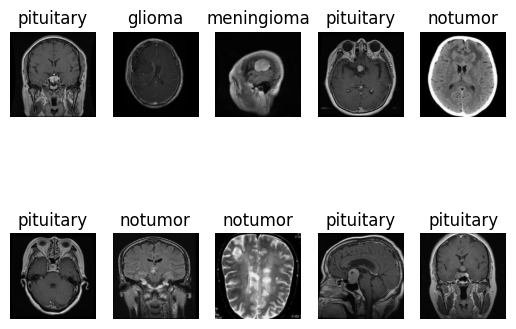

In [21]:
for image_batch,label_batch in trainds.take(1):
    for i in range(10):
        ax=plt.subplot(2,5,i+1)#uint8,float32 are most common
        plt.imshow(image_batch[i].numpy().astype("uint8"))#it means each pixel in imahg is represented by 8 bit unsigned integer
        plt.title(labels[label_batch[i]])
        plt.axis('off')

In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(s, s),
  layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [23]:
input_shape=(b,s,s,c)
model=Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(4,activation='softmax')
])
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# model.summary()
model.fit(trainds,epochs=30, batch_size=b, verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.4892 - loss: 1.1500
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.7423 - loss: 0.6613
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.7745 - loss: 0.5728
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8151 - loss: 0.4820
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.8325 - loss: 0.4273
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - accuracy: 0.8481 - loss: 0.3879
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8780 - loss: 0.3238
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8952 - loss: 0.2903
Epoch 9/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.8998 - loss: 0.2566
Epoch 10/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9171 - loss: 0.2273
Epoch 11/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.9206 - loss: 0.2118
Epoch 12/30
179/179 ━━━━━━━━━━━━━━━━━━━━

In [24]:
model.evaluate(testds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9783 - loss: 0.0805


[0.07495349645614624, 0.9794050455093384]

In [25]:
p=model.predict(testds)
pre=np.argmax(p,axis=1)
pre

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


array([1, 0, 2, ..., 2, 1, 0])

In [26]:
true_labels = []
predictions = []
from sklearn.metrics import confusion_matrix,classification_report
# for images, labels in testds.take(1):
for images, labels in testds:
    # Append the true labels to the list
    # true_labels.append(labels.numpy())
    true_labels.extend(labels.numpy())
    # Add your prediction logic here and append the results to `predictions`
    preds = model.predict(images)  # Example prediction step
    preds = np.argmax(preds, axis=1)  # Convert probabilities to class indices
    predictions.extend(preds)


# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [27]:
print(true_labels),print(predictions)

[1 0 2 ... 0 0 0]
[1 0 2 ... 0 0 0]


(None, None)

Text(50.722222222222214, 0.5, 'True')

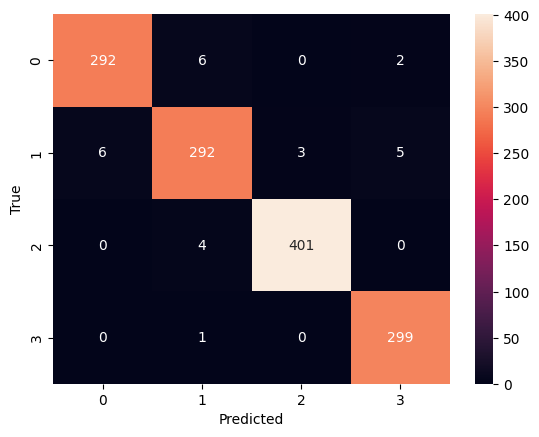

In [28]:
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [29]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       300
           1       0.96      0.95      0.96       306
           2       0.99      0.99      0.99       405
           3       0.98      1.00      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [38]:
classes=['glioma', 'meningioma', 'notumor', 'pituitary']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[2.2757745e-06 9.0209147e-07 9.9999678e-01 2.9503695e-12]]
tf.Tensor(0, shape=(), dtype=int32)
glioma


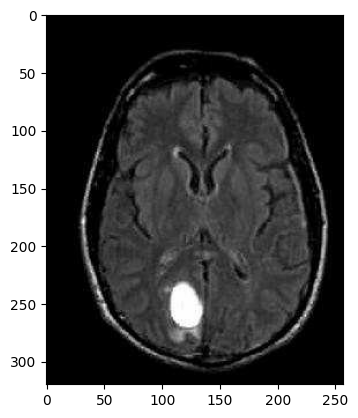

In [40]:
a="/content/drive/MyDrive/brain-tumor-mri-dataset/mri.png"

i=cv2.imread(a)
plt.imshow(i)

i=cv2.resize(i,(s,s))
i=i/255
i= np.expand_dims(i, axis=0)
p=model.predict(i)
print(p)
print(labels[np.argmax(p)])
print(classes[labels[np.argmax(p)]])



In [34]:
model.save("MRImodel.keras")